This script uses GeoPandas for spatial data handling and MatPlotLib for visualization.

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Plots appear in the notebook
%matplotlib inline

The source data is from the City of Albuquerque's Open Data GIS Portal (https://data-cabq.opendata.arcgis.com/).
The Municipal Boundaries, Bike and Multi-use Paths, and Libraries datasets are accessed via a GeoJSON API.

In [4]:
muni_geojson = 'http://data-cabq.opendata.arcgis.com/datasets/8206e174a09a4212bc257c4a9ef413ed_0.geojson'
path_geojson = 'http://data-cabq.opendata.arcgis.com/datasets/605a8d57f39d4befa8a613d56da8b52e_19.geojson'
lib_geojson = 'http://data-cabq.opendata.arcgis.com/datasets/856b785bdcf6401a9a0a941c4499e950_55.geojson'

muni = gpd.read_file(muni_geojson)
path = gpd.read_file(path_geojson)
library = gpd.read_file(lib_geojson)

Change the coordinate system to State Plane (New Mexico Central):

In [5]:
muni = muni.to_crs({'init':'esri:102713'})
path = path.to_crs({'init':'esri:102713'})
library = library.to_crs({'init':'esri:102713'})

Let's start working with the Municipal Boundaries dataset. By looking at a set of the Jurisdiction Name values from the attribute table, we see that the dataset comprises 6 incorporated places plus other, unincorporated areas.

In [6]:
set(muni['JURISDICTIONNAME'])

{'ALBUQUERQUE',
 'CORRALES',
 'EDGEWOOD',
 'LOS RANCHOS',
 'RIO RANCHO',
 'TIJERAS',
 'UNINCORPORATED AREAS'}

We can isolate the City of Albuquerque boundary and get its extent, which will become a bounding box for our visualization.

In [7]:
abq = muni[muni['JURISDICTIONNAME'] == 'ALBUQUERQUE']
bb = [i for i in abq.bounds.values[0]]  # Bounding Box [W, S, E, N]

While we'll continue to work with the Albuquerque boundary, we'll look at it in a plot and save a figure for later use.

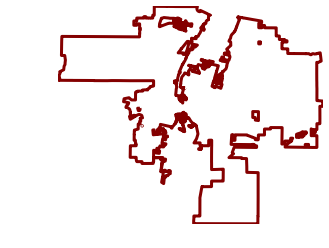

In [28]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim([bb[0], bb[2]])
ax.set_ylim([bb[1], bb[3]])
abq.plot(ax=ax, facecolor='none', edgecolor='xkcd:dark red', linewidth=3)
plt.axis('off')
plt.savefig('abq_boundary.svg', transparent=True)  # This will save an SVG file to the same directory as this script/notebook

Next, we'll work with the Bike and Multi-use Paths dataset. It comprises 8 types of bike facilities and 1 type of footpath.

In [9]:
set(path['PathType'].values)

{'BikeBlvd - A shared roadway optimized by bicycle traffic.',
 'BikeLane - A portion of the street with a designated lane for bicycles.',
 'BikeRoute - Cars and bicycles share the street.',
 'Buffered Lane - Conventional bike lanes paired with a designated buffer space.',
 'Crossing- Bicycle or pedestrian under/over crossings.',
 'Hiking trail - An unpaved trail open to foot traffic only.',
 'NMDOT - A Bicycle facility Owned and Maintained by NMDOT with different design standards than CABQ.',
 'Paved Multiple Use Trail - A paved trail closed to automotive traffic.',
 'Unpaved Multiple Use Trail – An unpaved trail closed to automotive traffic.'}

For this visualization, we'll exclude footpaths and NMDOT facilities.

In [10]:
bike = path[
    (path['PathType'] != 'NMDOT - A Bicycle facility Owned and Maintained by NMDOT with different design standards than CABQ.')\
    & (path['PathType'] != 'Hiking trail - An unpaved trail open to foot traffic only.')
    ]
set(bike['PathType'].values)

{'BikeBlvd - A shared roadway optimized by bicycle traffic.',
 'BikeLane - A portion of the street with a designated lane for bicycles.',
 'BikeRoute - Cars and bicycles share the street.',
 'Buffered Lane - Conventional bike lanes paired with a designated buffer space.',
 'Crossing- Bicycle or pedestrian under/over crossings.',
 'Paved Multiple Use Trail - A paved trail closed to automotive traffic.',
 'Unpaved Multiple Use Trail – An unpaved trail closed to automotive traffic.'}

We'll also dissolve (aggregate) the individual pieces of the bike network into network-wide features, one per path type.

In [11]:
bikeways = bike.dissolve('PathType')

As with the City boundary, bike paths can be plotted and saved before we look at libraries.

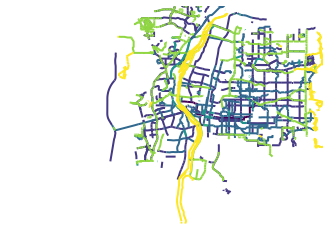

In [29]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim([bb[0], bb[2]])
ax.set_ylim([bb[1], bb[3]])
bikeways.plot(ax=ax, cmap='viridis', linewidth=2)
plt.axis('off')
plt.savefig('bikeways.svg', transparent=True)  # This will save an SVG file to the same directory as this script/notebook

The Libraries dataset does not need any processing. We'll just plot it and save it.

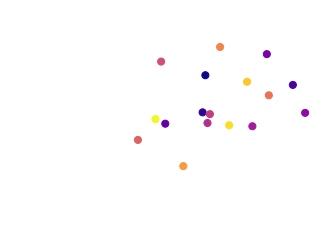

In [30]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim([bb[0], bb[2]])
ax.set_ylim([bb[1], bb[3]])
library.plot(ax=ax, cmap='plasma', markersize=50)
plt.axis('off')
plt.savefig('library.svg', transparent=True)  # This will save an SVG file to the same directory as this script/notebook

Finally, we visualize all three datasets together:

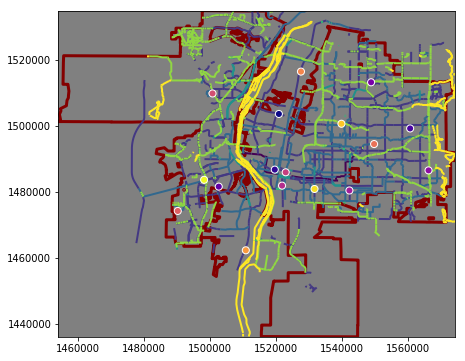

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_aspect('equal')
ax.set_facecolor('grey')
ax.set_xlim([bb[0], bb[2]])
ax.set_ylim([bb[1], bb[3]])
library.plot(ax=ax, cmap='plasma', markersize=50, edgecolor='white', zorder=3)
bikeways.plot(ax=ax, cmap='viridis', linewidth=2, zorder=2)
abq.plot(ax=ax, facecolor='none', edgecolor='xkcd:dark red', linewidth=3, zorder=1)
# We won't save this plot